- TF-IDF stands for "Term Frequency-Inverse Document Frequency.
- It is a numerical statistic used in information retrieval and text mining to measure the importance of a term within a document or a collection of documents.

TF-IDF consists of two main components:

**Term Frequency (TF):**This component measures the frequency of a term within a document. It represents how often a term appears in a document relative to the total number of terms in that document. TF is calculated using the formula:

TF = (Number of times the term appears in the document) / (Total number of terms in the document)

TF values are typically normalized to prevent bias towards longer documents, such as by using the logarithm of the raw frequency.

**Inverse Document Frequency (IDF):** This component measures the rarity of a term in a collection of documents. It helps to identify terms that are more discriminative or important to a specific document compared to the entire document collection.

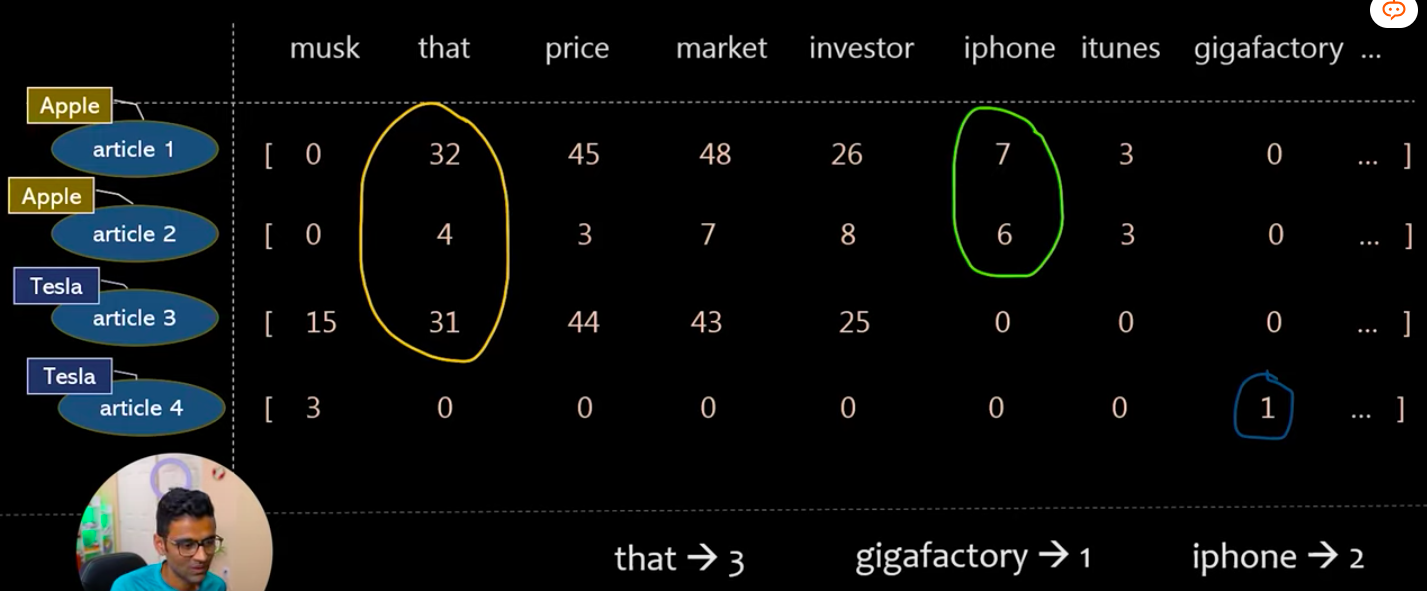

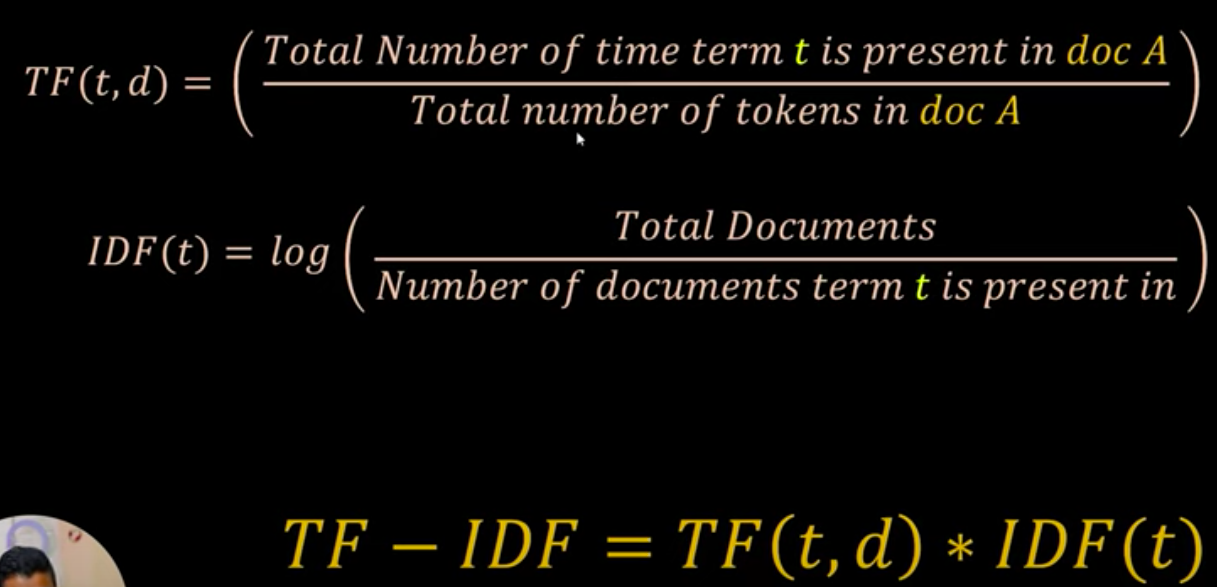

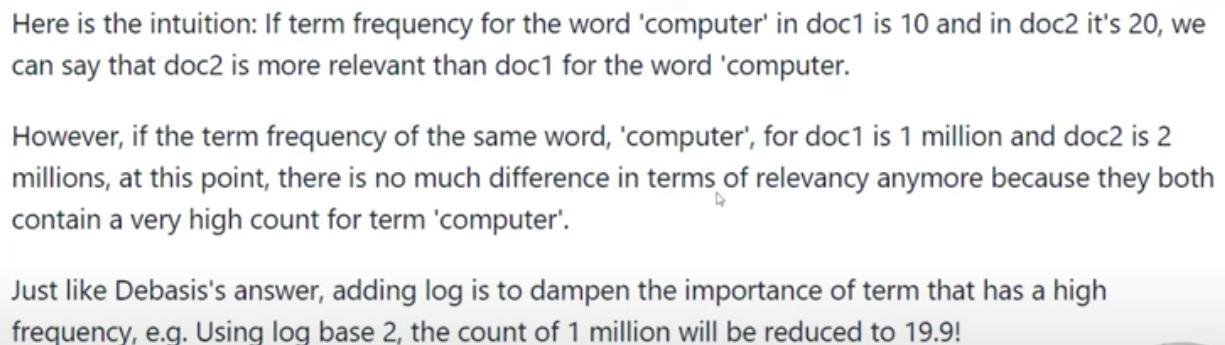

-The use of logarithms in the IDF formula is said to "dampen" the effect of IDF, meaning that it reduces the impact of very rare terms on the overall weighting scheme. This is because the logarithm function grows very slowly for large values, so the IDF weight for very rare terms will be relatively small compared to more common terms.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [ ]:
#let's create the vectorizer and fit the corpus and transform them accordingly

v= TfidfVectorizer()
transformed_output=v.fit_transform(corpus)
v.vocabulary_

{'thor': 25,
 'eating': 10,
 'pizza': 22,
 'loki': 17,
 'is': 16,
 'ironman': 15,
 'ate': 7,
 'already': 0,
 'apple': 5,
 'announcing': 4,
 'new': 20,
 'iphone': 14,
 'tomorrow': 26,
 'tesla': 24,
 'model': 19,
 'google': 12,
 'pixel': 21,
 'microsoft': 18,
 'surface': 23,
 'amazon': 2,
 'eco': 11,
 'dot': 9,
 'am': 1,
 'biryani': 8,
 'and': 3,
 'you': 27,
 'are': 6,
 'grapes': 13}

In [ ]:
v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [ ]:
#let's print the idf of each word:
f_n=v.get_feature_names_out()
for word in f_n:

    #let's get the index in the vocabulary
  index= v.vocabulary_.get(word)

  #get the score

  idf_score= v.idf_[index]
  print(f"{word}:{ idf_score}")

already:2.386294361119891
am:2.386294361119891
amazon:2.386294361119891
and:2.386294361119891
announcing:1.2876820724517808
apple:2.386294361119891
are:2.386294361119891
ate:2.386294361119891
biryani:2.386294361119891
dot:2.386294361119891
eating:1.9808292530117262
eco:2.386294361119891
google:2.386294361119891
grapes:2.386294361119891
iphone:2.386294361119891
ironman:2.386294361119891
is:1.1335313926245225
loki:2.386294361119891
microsoft:2.386294361119891
model:2.386294361119891
new:1.2876820724517808
pixel:2.386294361119891
pizza:2.386294361119891
surface:2.386294361119891
tesla:2.386294361119891
thor:2.386294361119891
tomorrow:1.2876820724517808
you:2.386294361119891


In [ ]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [ ]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

- From above you can see that already (index-0) has tf-idf score of 0.2426, while pizza (index-22) has tf-idf score of 0.72799642

# Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 kaggle.json

In [ ]:
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification

  0% 0.00/7.86M [00:00<?, ?B/s]
100% 7.86M/7.86M [00:00<00:00, 91.8MB/s]


In [ ]:
!ls

ecommerce-text-classification.zip  kaggle.json	sample_data


In [ ]:
!unzip ecommerce-text-classification.zip

Archive:  ecommerce-text-classification.zip
  inflating: ecommerceDataset.csv    


In [ ]:
import pandas as pd
#By default the csv file dint had any header
#So using this method we are adding header to file while we are reading it.

headers_names=['label','text']
df=pd.read_csv("ecommerceDataset.csv",header=None,names=headers_names)
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df.shape

(50425, 3)

In [ ]:
df = df.fillna('')

In [ ]:
df.label.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [ ]:
df['label_num']=df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})
df.head()

,label,text,label_num
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0


In [ ]:
#df=df.drop('label',axis=1)
#df.head()

,text,label_num
0,Paper Plane Design Framed Wall Hanging Motivat...,0
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Incredible Gifts India Wooden Happy Birthday U...,0


#Train test split

Build a model with original text (no pre processing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (40340,)
Shape of X_test:  (10085,)


In [ ]:
X_train.head()

34692    Status Quo Men's Synthetic Jacket Status Quo j...
12959    Inalsa Professional 2-Litre Deep Fryer (Black/...
20996    The Loney Review Winner of the Costa First Nov...
9828     Treo By Milton Cube Jar 310Ml, Set Of 6 Glassw...
28795    Foundations of Periodontics for the Dental Hyg...
Name: text, dtype: object

In [ ]:
y_train.value_counts()

0    15450
1     9456
2     8497
3     6937
Name: label_num, dtype: int64

In [ ]:
y_test.value_counts()

0    3863
1    2364
2    2124
3    1734
Name: label_num, dtype: int64

##Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

- use TF-IDF for pre-processing the text.

- use KNN as the classifier

- print the classification report.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
X_test[:5]

In [ ]:
y_test[:5]

In [ ]:
y_pred[:5]

#Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

- use TF-IDF for pre-processing the text.

- use MultinomialNB as the classifier.

- print the classification report.

In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

##Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

- use TF-IDF for pre-processing the text.

- use Random Forest as the classifier.

- print the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [ ]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [ ]:
df.head()

In [ ]:
df.Text[0]

In [ ]:
df.preprocessed_txt[0]

### Build a model with pre processed text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

Let's check the scores with our best model till now

**Random Forest**

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

## Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')